# Saudi Arabia Used Cars: Price Prediction

### **Contents**

1. Business Problem
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## 1. Business Problem

**Context**

Saudi Arabia has a population of around 35 million as of August 21st, 2022 and according to demographic studies, most Saudi families own at least two cars (~92% have at least one car and >56% have more than one car). It has been observed that Saudis use their car for a range of activities including the daily commute to schools, offices, and shopping. On the other hand, about 50% of the population are at an average age of 30 and have limited spending power. This will lead to considerable of purchasing a used car than a new car.The demand for used cars in KSA is likely to remain strong in the short to mid-term perspective. The market in KSA is about US$ 16.8 billion in revenue (0.9 million units) in 2019 and is estimated to grow at a CAGR of 6,3% in the next 6 years to reach USD 24.3 billion in 2025. 

In order to tap more consumers, many dealerships are expected to increase their presence online. Along with the listing of used car inventory online, some dealerships are planning to develop e-commerce platforms to sell used cars. Nowadays, online App based transactions for Used cars in KSA reach about 3% to 5% of the overall market with the key player being Kayishha, Yallamotor, SaudiSale, etc. It enables 100% online end-to-end transactions from the convenience of the homes without having to visit the showrooms, with all this convenience; effective pricing strategies play an essential role for sellers because they have the freedom to set the price. Effective pricing strategies can help the seller to sell their products in a competitive market to witness a profit. **Most of them use conventional methods that value intuition and subjective opinion over hard data. And that’s why decisions based on such processes often lead into traps.**


**Problem Statement**

In this issue, the problems from the un-effective pricing strategies to sell the used cars in the marketplace in KSA are both overpricing and underpricing. Overprice will make customers not interested to buy while underpricing will made a loss profit, so before selling their car in the marketplace the question is “**how much my car is worth?**”

**Goals**

Based on the problem statement above, the marketplace definitely needs to have a tool that can predict the best price of selling used cars. Since the price depends on so many factors like car type, mileage,etc, the prediction is not an easy task. A more feasible strategy is to use a machine learning approach. It might be helpful to support pricing strategic decision-making.

**Analytic Approach**

Step 1; we identify important features that can be used to predict the price of cars

Step 2, we preprocess the data

Step 3, we apply ML models on the preprocessed dataset with features as inputs and the price as output.

**Metric Evaluation**

Evaluation metrics that will be used in this model are **MSE** (Mean Squared Error), **RMSE** (Root of Mean Squared Error), and **MAPE** (Mean Absolute Percentage Error) . The smaller value of RMSE, MAE, and MAPE produced, the more accurate model in predicting the price according to the limitation of the feature used. In addition, we can also use the value of **R-squared** if the final model selected is a linear model.
****

## 2. Data Understanding

In this step, we understand how the raw data was collected; step 1) read the dataset, step 2) giving the descripton of variable for the better understanding the data assets

In [810]:
# Import library needed to explore dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [811]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [812]:
# Change columns name for the better understand
df.rename(columns = {'Make':'Car_Brands', 'Gear_Type':'Transmission'}, inplace = True)

In [813]:
df.shape

(5624, 11)

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          5624 non-null   object 
 1   Region        5624 non-null   object 
 2   Car_Brands    5624 non-null   object 
 3   Transmission  5624 non-null   object 
 4   Origin        5624 non-null   object 
 5   Options       5624 non-null   object 
 6   Year          5624 non-null   int64  
 7   Engine_Size   5624 non-null   float64
 8   Mileage       5624 non-null   int64  
 9   Negotiable    5624 non-null   bool   
 10  Price         5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used cars |
| Region | Object | Region of used cars |
| Car_Brands | Object | Brand of used cars |
| Transmission | Object | Transmission of used cars |
| Origin | Object | Origin of used cars |
| Options | Object | Option of used cars |
| Year | Integer | Manufacturing year of used cars |
| Engine_Size | Float  | Engine size of used cars |
| Mileage | Integer | Mileage of used cars |
| Negotiable | Bool | Negotiable status of used cars |
| Price | Float | Price of used cars (SAR) |


<br>

From information above, we may notice the following:
* Dataset has **5624 rows and 11 columns**. Each row consist of used car for sale in 2022 and each column consist of specific feature.
* `Price` column has **0 value**.  We should check before we decide to handle.

****

## 3. Data Preprocessing

In [815]:
# Duplicated dataframe
df_model = df.copy()

In [816]:
df_model.shape

(5624, 11)

In [817]:
# Check detail information
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[X-Terra, Coolray]"
1,Region,object,0,0.0,27,"[Taef, Al-Medina]"
2,Car_Brands,object,0,0.0,58,"[Lexus, Volkswagen]"
3,Transmission,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Gulf Arabic, Saudi]"
5,Options,object,0,0.0,3,"[Standard, Full]"
6,Year,int64,0,0.0,50,"[1986, 2017]"
7,Engine_Size,float64,0,0.0,71,"[2.5, 4.5]"
8,Mileage,int64,0,0.0,1716,"[201, 324000]"
9,Negotiable,bool,0,0.0,2,"[False, True]"


There are 'Unknown' value on Origin, lets check the detail

In [818]:
df_model['Origin'].value_counts()

Saudi          4188
Gulf Arabic     697
Other           678
Unknown          61
Name: Origin, dtype: int64

Its better to move on other value, to make it clean.

In [819]:
# Replace 'Unknown' to 'Other' on Origin variable
df_model['Origin'] = df_model['Origin'].replace('Unknown','Other')
df_model['Origin'].value_counts()

Saudi          4188
Other           739
Gulf Arabic     697
Name: Origin, dtype: int64

### Check for duplicate rows

In [820]:
# Cek data duplikat
print("Number of duplicate rows: ", df_model.duplicated().sum())

Number of duplicate rows:  4


In [821]:
# Drop data duplikat
df_model.drop_duplicates(inplace=True)
print("Number of duplicate rows after treatment: ", df_model.duplicated().sum())

Number of duplicate rows after treatment:  0


### Check for missing values

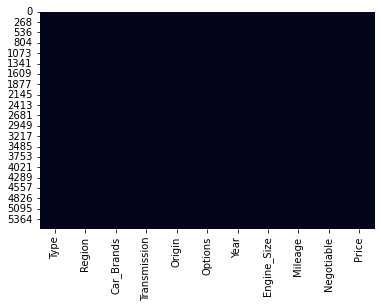

In [822]:
# Create missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

In [823]:
df.isna().sum()

Type            0
Region          0
Car_Brands      0
Transmission    0
Origin          0
Options         0
Year            0
Engine_Size     0
Mileage         0
Negotiable      0
Price           0
dtype: int64

### Dropping unnecessary columns and removing impermissible values

In [824]:
# Check for columns with '0' value
df[df['Price'] == 0]['Price'].count()

1797

Cause the Variable Price with 0 value is 1796 data (31,39% of the data), we must check before the reasons why the value of price is 0

In [825]:
df_duplicate = df[(df['Price'] == 0)]
df_duplicate.head()

,Type,Region,Car_Brands,Transmission,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0


From the table above, we can see that the value of negotiable are almost true

In [826]:
df_duplicate['Negotiable'].value_counts()

True     1796
False       1
Name: Negotiable, dtype: int64

In [827]:
#Dropping 'negotiable' column and '0' value
df_model = df_model[(df_model['Price'] != 0)]
df_model = df_model.drop(['Negotiable'], axis=1)
df_model.head()

,Type,Region,Car_Brands,Transmission,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [828]:
df_model.shape

(3824, 10)

### Check Outliers

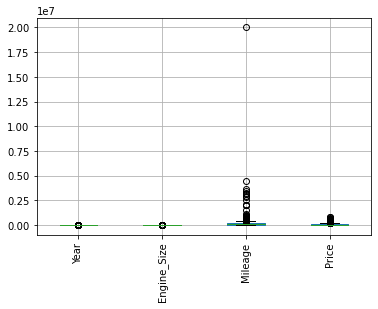

In [829]:
df_model.boxplot(rot=90);

In [830]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')   

**Price**

<AxesSubplot:xlabel='Price'>

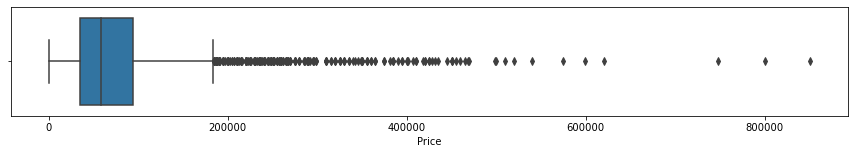

In [831]:
# Check the 'Price' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Price"])

In [832]:
df_model['Price'].describe()

count      3824.000000
mean      78019.245031
std       72748.182183
min           1.000000
25%       35000.000000
50%       58000.000000
75%       94250.000000
max      850000.000000
Name: Price, dtype: float64

In [833]:
# Outliers on feature price based on domain knowledge
df_model.sort_values(by='Price', ascending=1, inplace=True)
df_model.head(10)

,Type,Region,Car_Brands,Transmission,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,1002
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,1010


Data above shows that used car sell with price below 1000/around 1000 Riyal. It's imposible to sell an used cars with that price. Based on reasearch on marketplace, the possible price is not less than 3000 (source: [Yalla Motor](https://ksa.yallamotor.com/used-cars/search?sort=price_asc) , [Hatla2ee](https://ksa.hatla2ee.com/en/car), [Car Switch](https://ksa.carswitch.com/en/saudi/used-cars/search?sort=price+ASC#))

In [834]:
# Outliers on feature price based on IQR method
find_anomalies(df_model['Price'])

IQR: 59250.0
limit_bawah: -53875.0
limit_atas: 183125.0


In [835]:
print("Percentage of data price more than 182331.25 :",((df_model[df_model['Price'] > 182331.25].count()['Price'])/3824)*100,"%")
print("Percentage of data price less than or equal to 3000 :",((df_model[df_model['Price'] <= 3000].count()['Price'])/3824)*100,"%")

Percentage of data price more than 182331.25 : 6.82531380753138 %
Percentage of data price less than or equal to 3000 : 1.6213389121338913 %


Based on the IQR method and domain knowledge we can limit the model to the price range of 3000 – 182331 SAR. Therefore, data that has prices outside this range will not be included in the modeling so the skewness will be reduced

In [836]:
#filtering data
df_model = df_model[(df_model['Price'] >= 3000) & (df_model['Price'] <= 182331.25)]

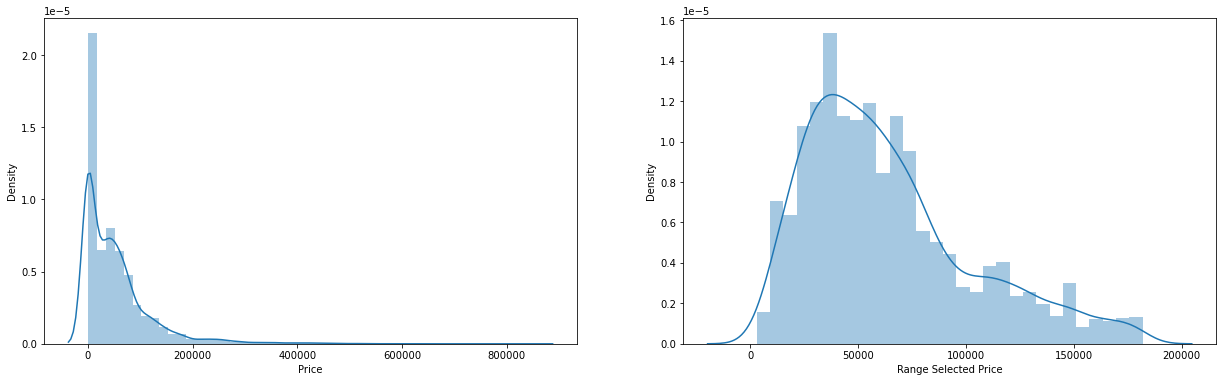

In [837]:
# Plot distribution before and after preprocess
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [838]:
df_model.shape

(3502, 10)

**Mileage**

<AxesSubplot:xlabel='Mileage'>

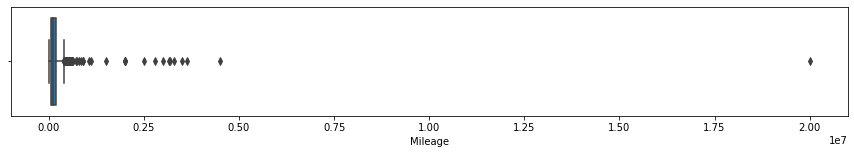

In [839]:
# Check the 'Mileage' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Mileage"])

In [840]:
df_model['Mileage'].describe()

count    3.502000e+03
mean     1.506679e+05
std      3.941228e+05
min      1.000000e+02
25%      5.500000e+04
50%      1.100000e+05
75%      1.930000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

In [841]:
# Outliers on feature mileage
find_anomalies(df['Mileage'])

IQR: 158000.0
limit_bawah: -199000.0
limit_atas: 433000.0


In [842]:
print("Count of data price more than 433000 :",(df[df['Mileage'] > 433000].count()['Mileage']))
print("Percentage of data price more than 433000 :",((df_model[df_model['Mileage'] > 433000].count()['Mileage'])/3502)*100,"%")

Count of data price more than 433000 : 175
Percentage of data price more than 433000 : 2.31296402055968 %


In [843]:
#filtering data
df_model = df_model[df_model['Mileage'] <= 433000]

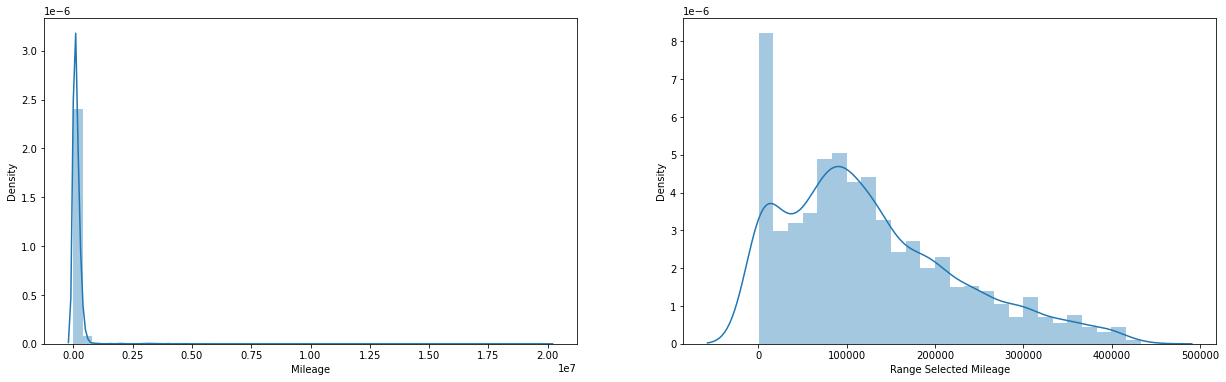

In [844]:
# Plot distribution before and after preprocess
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(df_model['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

### Clean Dataset

In [845]:
print("Data shape before process=",df.shape)
print("Data shape after process=",df_model.shape)
diff=df.shape[0]-df_model.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_model.shape[1]))
df_model.to_csv("saudiusedcarsfinal.csv",index=False)

Data shape before process= (5624, 11)
Data shape after process= (3421, 10)
Total 2203 rows and 1 cols removed


In [846]:
# Check clean dataset 
df_model.head()

,Type,Region,Car_Brands,Transmission,Origin,Options,Year,Engine_Size,Mileage,Price
714,Victoria,Riyadh,Ford,Automatic,Saudi,Full,2001,4.6,399249,3000
2100,Grand Cherokee,Najran,Jeep,Automatic,Saudi,Full,2017,5.7,13300,3100
5121,Accent,Qassim,Hyundai,Manual,Saudi,Standard,2008,1.6,250000,4000
5521,Suburban,Al-Medina,Chevrolet,Automatic,Other,Semi Full,1997,6.0,292764,4000
5009,Expedition,Al-Jouf,Ford,Automatic,Saudi,Full,2003,5.4,400000,4000


In [847]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 714 to 2605
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3421 non-null   object 
 1   Region        3421 non-null   object 
 2   Car_Brands    3421 non-null   object 
 3   Transmission  3421 non-null   object 
 4   Origin        3421 non-null   object 
 5   Options       3421 non-null   object 
 6   Year          3421 non-null   int64  
 7   Engine_Size   3421 non-null   float64
 8   Mileage       3421 non-null   int64  
 9   Price         3421 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 294.0+ KB


### Exploratory Data Analysis
Exploratory data analysis is a process of summarizing, visualizing and getting deeply acquainted the data and extracting insights from it. It will give us the basic understanding of our data, it's distribution, the correlation among features etc

The column Price is the target variable and rest of the columns are independent variables. The independent variables are divided into Categorical and Numerical variabels.

Hereby we seperate each of type the variabel itself

- **Numerical Variables** : `Year`, `Engine_Size`, `Mileage`, `Price`
- **Categorical Variables** : `Type`, `Region`, `Car_Brands`, `Transmission`, `Origin`, `Options`

### EDA: Numerical Variable

In [848]:
df_model.describe()

,Year,Engine_Size,Mileage,Price
count,3421.000000,3421.000000,3421.000000,3421.000000
mean,2014.740719,3.109792,126815.242327,64662.763227
std,4.962226,1.439063,97877.826186,38798.146769
min,1963.000000,1.000000,100.000000,3000.000000
25%,2013.000000,2.000000,54000.000000,35000.000000
50%,2016.000000,2.700000,107000.000000,55500.000000
75%,2018.000000,4.000000,184000.000000,83500.000000
max,2021.000000,9.000000,433000.000000,182000.000000


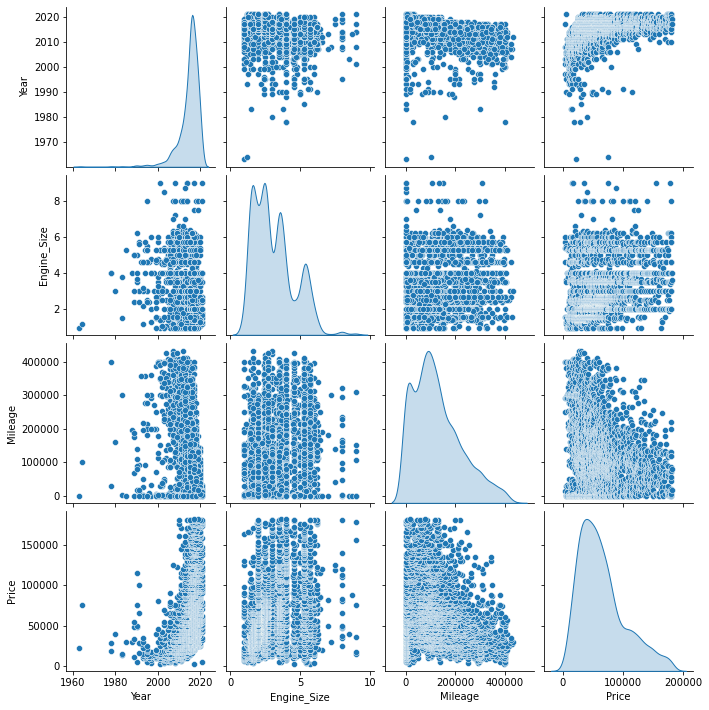

Skewness and Kurtosis of Year: -2.7728751994723906, 14.089438931536941.
Skewness and Kurtosis of Engine_Size: 0.7910219522211036, 0.12533091511070094.
Skewness and Kurtosis of Mileage: 0.7994196838381985, 0.06119947041024609.
Skewness and Kurtosis of Price: 0.7994196838381985, 0.06119947041024609.


In [849]:
# Pair plot
sns.pairplot(df_model[['Year','Engine_Size','Mileage','Price']], diag_kind="kde")
plt.show()

print("Skewness and Kurtosis of Year: {0}, {1}.".format(df_model['Year'].skew(),df_model['Year'].kurt()))
print("Skewness and Kurtosis of Engine_Size: {0}, {1}.".format(df_model['Engine_Size'].skew(),df_model['Engine_Size'].kurt()))
print("Skewness and Kurtosis of Mileage: {0}, {1}.".format(df_model['Mileage'].skew(), df_model['Mileage'].kurt()))
print("Skewness and Kurtosis of Price: {0}, {1}.".format(df_model['Mileage'].skew(), df_model['Mileage'].kurt()))

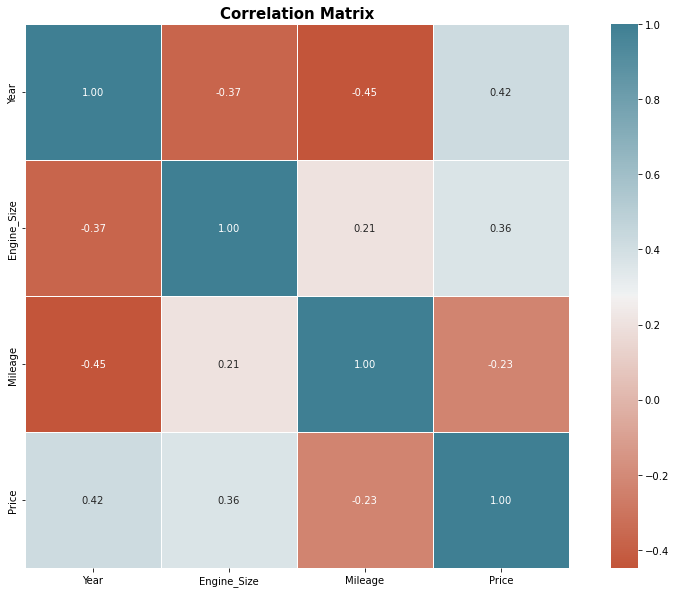

In [850]:
# Correlation matrix
plt.figure(figsize=(15, 10))
palette=sns.diverging_palette(20, 220, n=256)
df_corr = df_model.copy()
corr = df_corr.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

As we can see from the pairplot graph above, year and price are positively correlated showing that cars with new year of manufacture have a high price. In other hand, mileage and price are negatively correlated showing that cars with long kilometers have a low price.

From the histograms, we learn that the year variables are heavily left-skewed.

**Year**

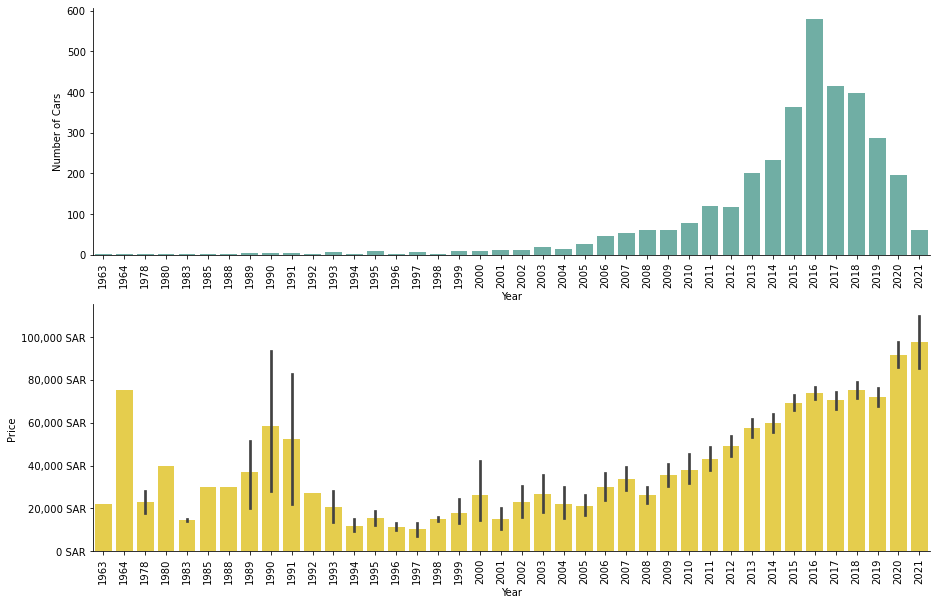

In [851]:
fig, ax = plt.subplots(2,1, figsize = (15,10))
sns.countplot(data=df_model,x = 'Year', ax=ax[0],color= "#3FA796", alpha= 0.8)
sns.barplot(x='Year',y='Price',data=df_model,ax=ax[1],color= "#FFD700", alpha= 0.8)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
ax[0].set_ylabel('Number of Cars')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
ax[1].set_yticklabels('{:,.0f}'.format(x) + ' SAR' for x in ax[1].get_yticks())
sns.despine()

From barplot above, we can see that car prices have an upward trend year on year after 1994. Below 1994, barplot has no visible pattern. Lets check closely.

In [852]:
df_year = df_model.copy()
df_year = df_year[df_year['Year'] <= 1994]
df_year = df_year.sort_values(by = 'Price', ascending = False)
df_year.head()

,Type,Region,Car_Brands,Transmission,Origin,Options,Year,Engine_Size,Mileage,Price
4096,SEL,Dammam,Mercedes,Automatic,Other,Full,1990,6.2,79000,115000
3859,SEL,Jeddah,Mercedes,Automatic,Other,Full,1991,5.6,17000,100000
2262,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,75000
434,SEL,Dammam,Mercedes,Automatic,Other,Full,1990,4.0,89000,75000
1987,Fleetwood,Al-Ahsa,Cadillac,Automatic,Other,Full,1991,5.7,91000,65000


Based on table above, it shows that list of car type is a classic car who that has a fairly high price. Removing those outliers might result in biased analysis, therefore, no outlier was dropped.

**Engine Size**

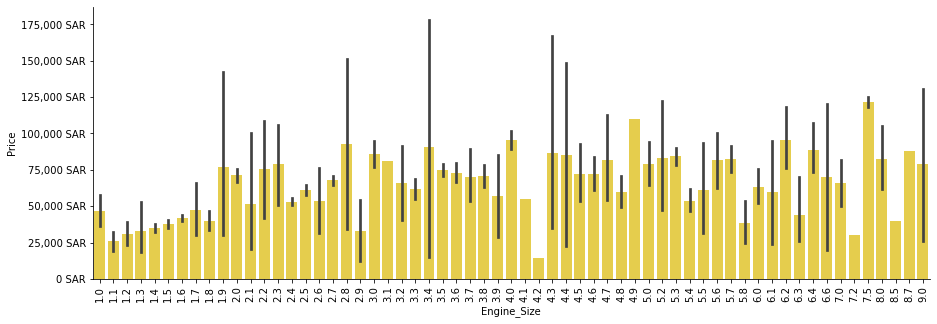

,Engine_Size,Number of Cars,Median of Price
56,7.5,2,121500.0
39,4.9,1,110000.0
30,4.0,182,100000.0
13,2.3,11,97000.0
18,2.8,5,91000.0
59,8.7,1,88000.0
12,2.2,5,85000.0
52,6.4,4,85000.0
41,5.2,4,84500.0
50,6.2,22,83500.0


In [853]:
plt.figure(figsize = (15, 5))
ax = sns.barplot(x='Engine_Size',y='Price',data=df_model,color= "#FFD700", alpha= 0.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_yticklabels('{:,.0f}'.format(x) + ' SAR' for x in ax.get_yticks())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

df_size = df_model.groupby('Engine_Size') \
           .agg({'Engine_Size':'size', 'Price':'median'}) \
           .rename(columns={'Engine_Size':'Number of Cars','Price':'Median of Price'}) \
           .reset_index()
df_size = df_size.sort_values('Median of Price', ascending =False)
df_size = df_size.iloc[:10]
display(df_size)

### EDA: Categorical Variable

In [854]:
df_model.describe(include = 'object')

,Type,Region,Car_Brands,Transmission,Origin,Options
count,3421,3421,3421,3421,3421,3421
unique,303,27,54,2,3,3
top,Accent,Riyadh,Toyota,Automatic,Saudi,Standard
freq,146,1448,792,3058,2629,1257


**EDA based on: `Car Brands` and `Type`**

In [855]:
# Grouping car brands,sorted by number of cars
df_brands = df_model.groupby('Car_Brands') \
           .agg({'Car_Brands':'size', 'Price':'median'}) \
           .rename(columns={'Car_Brands':'Number of Cars','Price':'Median of Price'}) \
           .reset_index()
df_brands = df_brands.sort_values('Number of Cars', ascending =False)
df_brands = df_brands.iloc[:10]

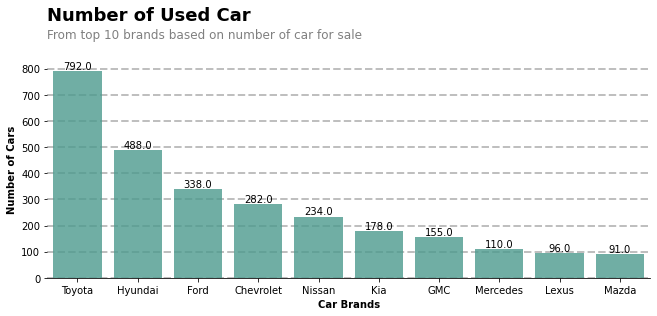

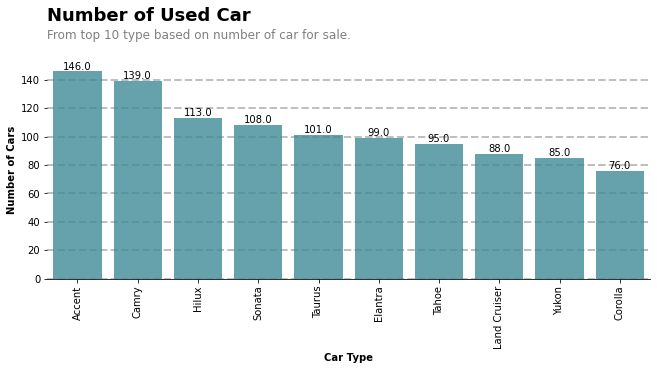

In [856]:
# Visualizing number of cars based on car brands
plt.figure(figsize = (10.8, 4))
ax = sns.barplot(data= df_brands,x = "Car_Brands", y= "Number of Cars", color= "#3FA796", alpha= 0.8, zorder= 4)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
ax.set_xlabel("Car Brands", fontweight= "bold")
ax.set_ylabel("Number of Cars", fontweight= "bold")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(
    "Number of Used Car", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 18,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        })

ax.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.1, 
    'From top 10 brands based on number of car for sale', 
    fontsize= 12, 
    color= "grey")
ax.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.8)
plt.show()

# Visualizing number of cars based on car type
df_type = pd.DataFrame(df_model["Type"].value_counts().iloc[:10].sort_values(ascending=False).reset_index().rename(columns={"index":"Type","Type":"Number of Cars"}))

plt.figure(figsize = (10.8, 4))
ax = sns.barplot(data= df_type,x = "Type", y= "Number of Cars", color= "#2f96a5", alpha= 0.8, zorder= 4)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
ax.set_xlabel("Car Type", fontweight= "bold")
ax.set_ylabel("Number of Cars", fontweight= "bold")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(
    "Number of Used Car", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 18,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        })

ax.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.1, 
    'From top 10 type based on number of car for sale.', 
    fontsize= 12, 
    color= "grey")
ax.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.8)
plt.show()

Barchart above shows the high correlation each other that **Toyota** is the most used car produced by the other company because the Top 10 used cars based on car type are filled with Toyota brand (Land Cruiser, Camry, Hilux & Corolla). On the other hand, **Hyundai** made the second most produced used cars with Accent, Sonata, and Elantra type.

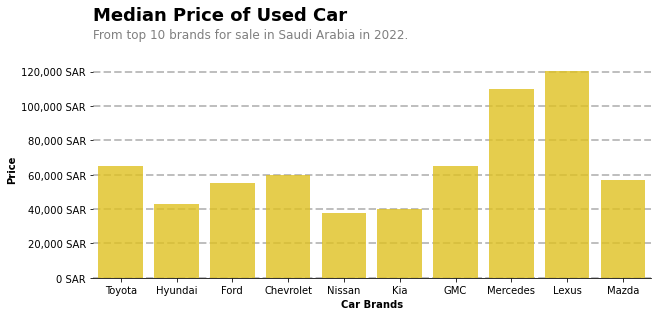

,Car_Brands,Number of Cars,Median of Price
49,Toyota,792,65000.0
25,Hyundai,488,43000.0
15,Ford,338,55000.0
8,Chevrolet,282,60000.0
43,Nissan,234,37500.0
31,Kia,178,40000.0
18,GMC,155,65000.0
40,Mercedes,110,110000.0
33,Lexus,96,120500.0
39,Mazda,91,57000.0


In [857]:
# Visualizing number of cars based on car brands
plt.figure(figsize= (10, 4))
ax = sns.barplot(data= df_brands,x = "Car_Brands", y= "Median of Price", color= "#FFD700", alpha= 0.8, zorder= 4)
ylabels = ['{:,.0f}'.format(x) + ' SAR' for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
ax.set_xlabel("Car Brands", fontweight= "bold")
ax.set_ylabel("Price", fontweight= "bold")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(
    "Median Price of Used Car", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 18,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        })

ax.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.1, 
    'From top 10 brands for sale in Saudi Arabia in 2022.', 
    fontsize= 12, 
    color= "grey")

ax.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.8)

# plt.savefig("graph_1.png", facecolor= "white", bbox_inches= "tight", dpi= 200)
plt.show()
display(df_brands)

Barchart above shows Lexus has the highest price about two higher than the median price of all used cars (55500 riyals) and Mercedes has a slightly different number than Lexus. On the other hand, another company (Toyota, Hyundai, Ford, Chevrolet, Mazda) on the chart has a number in a range of the median price of all used cars. 

In [858]:
# Grouping car brands, sorted by median of price
df_brands = df_model.groupby('Car_Brands') \
           .agg({'Car_Brands':'size', 'Price':'median'}) \
           .rename(columns={'Car_Brands':'Number of Cars','Price':'Median of Price'}) \
           .reset_index()
df_brands = df_brands.sort_values('Median of Price', ascending =False)
df_brands = df_brands.iloc[:10]
df_brands

,Car_Brands,Number of Cars,Median of Price
0,Aston Martin,1,180000.0
4,Bentley,1,175000.0
38,Maserati,2,125000.0
33,Lexus,96,120500.0
29,Jaguar,6,120000.0
5,Cadillac,22,116500.0
40,Mercedes,110,110000.0
46,Porsche,10,99000.0
21,Great Wall,1,95000.0
28,Iveco,1,92000.0


Table above shows top 10 brands sorted by the highest of median price, it shows that car brand has a high correlation with price

**Top 10 type of toyota based on number of car for sale**

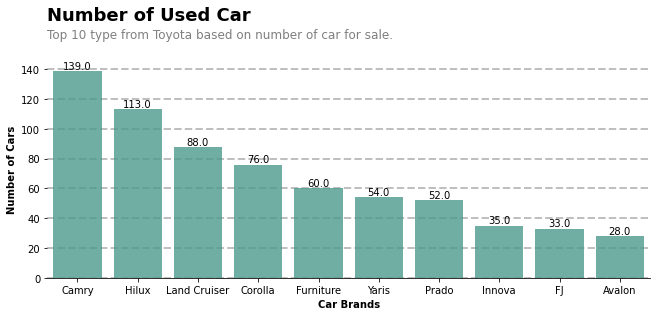

In [859]:
df_toyota = df_model.copy()
df_toyota = df_toyota[(df_toyota['Car_Brands'] == "Toyota")]
df_tt = pd.DataFrame(df_toyota["Type"].value_counts().sort_values(ascending=False).reset_index().iloc[:10].rename(columns={"index":"Type","Type":"Number of Cars"}))

# Visualizing number of cars based on car brands
plt.figure(figsize = (10.8, 4))
ax = sns.barplot(data= df_tt,x = "Type", y= "Number of Cars", color= "#3FA796", alpha= 0.8, zorder= 4)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
ax.set_xlabel("Car Brands", fontweight= "bold")
ax.set_ylabel("Number of Cars", fontweight= "bold")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(
    "Number of Used Car", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 18,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        })

ax.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.1, 
    'Top 10 type from Toyota based on number of car for sale.', 
    fontsize= 12, 
    color= "grey")
ax.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.8)
plt.show()



**Price and Median Price of Used Car from Toyota Brand**

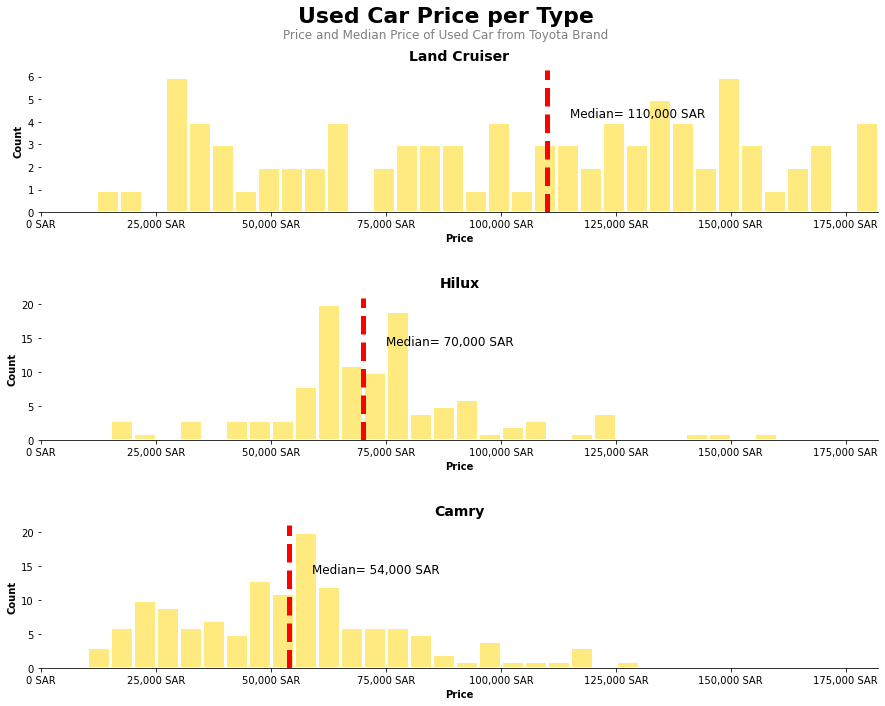

In [860]:
# Disribution price and median price of top 3 type from toyota
list_top = ['Land Cruiser','Camry','Hilux']
df_top = df_toyota.copy()
df_top = df_top[(df_top['Type'].isin(list_top))]
list_sort = df_top.groupby('Type')['Price'].median().sort_values(ascending= False).index.to_list()
list_title= [
    'Land Cruiser',
    'Hilux',
    'Camry'
    ]

fig, axs = plt.subplots(nrows = 3, figsize=(15, 11))

i = 0

for car in list_sort:
    median=  df_top.loc[(df_top["Type"] == car), "Price"].median()

    sns.histplot(
        data= df_top[df_top["Type"] == car],
        x= "Price",
        binwidth= 5000,
        color= "#FFD700",
        alpha= 0.5,
        edgecolor= "white", 
        ax= axs[i]
    )

    axs[i].axvline(x= median,
        color= 'red',
        lw= 5,
        ls= "--")

    axs[i].text(
        x= median + 5000, 
        y= (axs[i].get_ylim())[1] / 1.5,
        fontsize= 12,
        s= 'Median= {median:,.0f} SAR'.format(
            median= (median)
    ))

    plt.setp(axs[i].patches, linewidth= 3)
    axs[i].set_xlim([0, (df_top["Price"].max())])
    xlabels = ['{:,.0f}'.format(x) + ' SAR' for x in axs[i].get_xticks()]
    axs[i].set_xticklabels(xlabels)
    axs[i].set_xlabel("Price", fontweight= "bold")
    axs[i].set_ylabel("Count", fontweight= "bold")
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].set_title(list_title[i], pad= 10, fontdict= 
        {
            'fontsize':14,
            'fontweight': "bold",
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
            })
    i = i + 1
    
plt.suptitle("Used Car Price per Type", fontsize= 22, fontweight= "bold", y= 0.96)
plt.text(.5, 0.92, 'Price and Median Price of Used Car from Toyota Brand', 
    transform=fig.transFigure, horizontalalignment='center', fontsize= 12, color= "grey")

plt.subplots_adjust(hspace= 0.6)
plt.show()

**Price based on age: Land Cruiser**

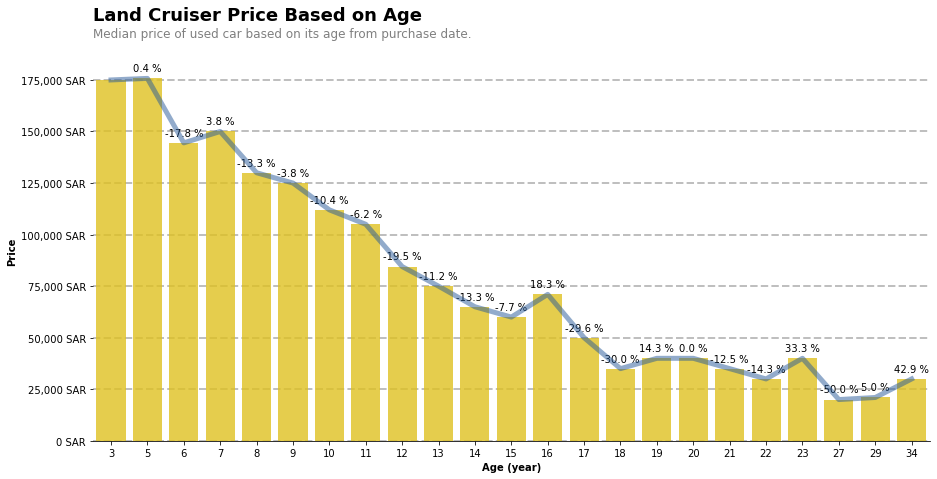

In [861]:
list_type = ["Land Cruiser"]
df_type = df_toyota.copy()
df_type = df_type[(df_type['Type'].isin(list_type))]
df_type = df_type.sort_values('Year',ascending = False)

df_type = pd.DataFrame(df_type.groupby("Year")["Price"].median())
df_type = df_type[(df_type['Price'] != 0)]
df_type = df_type.reset_index()
df_type["Age"]= 2022 - df_type["Year"].astype(int)
df_type = df_type.sort_values("Age")
df_type["Age"]= df_type["Age"].astype(str)

df_type["Pct. Diff"]= (df_type["Price"].pct_change()) * 100
df_type["Pct. Diff"]= round(df_type["Pct. Diff"],1)
df_type["Pct. Diff"]= df_type["Pct. Diff"].astype(str) + " %"
df_type["Pct. Diff"]= df_type["Pct. Diff"].replace({
    "nan %": ""})

plt.figure(figsize= (15, 7))

ax= sns.lineplot(data= df_type,x= "Age",y= "Price",color= "#265999",linewidth= 5,alpha= 0.5,zorder= 5)
ax= sns.barplot(data= df_type,x= "Age",y= "Price",color= "#FFD700",alpha= 0.8,zorder= 4)

ylabels = ['{:,.0f}'.format(x) + ' SAR' for x in ax.get_yticks()]
ax.set_yticklabels(ylabels)
ax.set_xlabel("Age (year)", fontweight= "bold")
ax.set_ylabel("Price", fontweight= "bold")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar_label(ax.containers[0], labels= df_type["Pct. Diff"], padding = 5)

ax.set_title(
    list_type[0] + " Price Based on Age", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 18,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        # 'horizontalalignment': "right"
        })

plt.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.06, 
    'Median price of used car based on its age from purchase date.', 
    fontsize= 12, 
    color= "grey")

plt.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.8)

# plt.savefig("graph_1.png", facecolor= "white", bbox_inches= "tight")
plt.show()

Based on barplot above show that price and age are negative correlated, this means with increasing age the price will decrease. This is the opposite of relationship between year and price.

**EDA based on: `Region` and `Origin`**

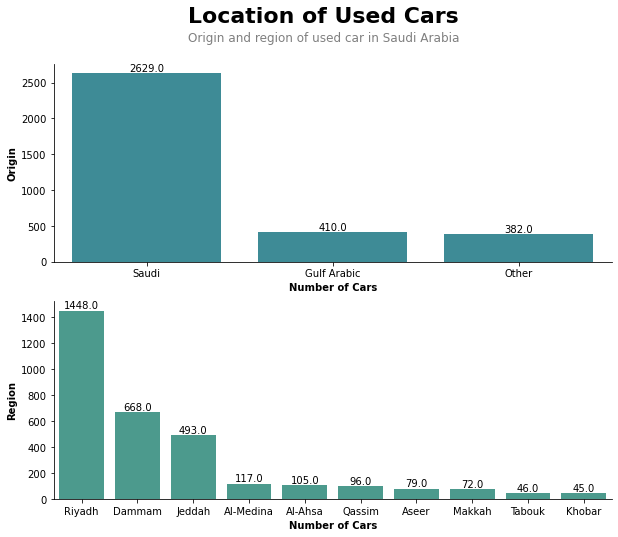

In [862]:
df_region = pd.DataFrame(df_model["Region"].value_counts().sort_values(ascending=False).reset_index().rename(columns={"index":"Region","Region":"Number of Cars"}))
df_origin = pd.DataFrame(df_model["Origin"].value_counts().sort_values(ascending=False).reset_index().rename(columns={"index":"Origin","Origin":"Number of Cars"}))

fig, ax = plt.subplots(2,1, figsize = (10,8))
sns.barplot(x= df_region['Region'].head(10), y= df_region['Number of Cars'].head(10), color= "#3FA796",ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
sns.barplot(x= df_origin['Origin'].head(10), y= df_origin['Number of Cars'].head(10), color= "#2f96a5",ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
ax[0].set_xlabel("Number of Cars", fontweight= "bold")
ax[0].set_ylabel("Origin", fontweight= "bold")
ax[1].set_xlabel("Number of Cars", fontweight= "bold")
ax[1].set_ylabel("Region", fontweight= "bold")
ax[1].set_xticklabels(ax[1].get_xticklabels())
plt.suptitle("Location of Used Cars", fontsize= 22, fontweight= "bold", y= 0.98)
plt.text(.5, 0.92, 'Origin and region of used car in Saudi Arabia', 
    transform=fig.transFigure, horizontalalignment='center', fontsize= 12, color= "grey")
sns.despine()

As we can see that Riyadh is the most Region of used cars (about 1448 cars) while Saudi is the most of Origin of used cars (more than 2629 cars). Seem this graph had a correlation each other.

**EDA based on: `Transmission` and `Option`**

In [863]:
df_model.groupby(['Transmission', 'Options'])['Options'].count()

Transmission  Options  
Automatic     Full         1107
              Semi Full     861
              Standard     1090
Manual        Full          109
              Semi Full      87
              Standard      167
Name: Options, dtype: int64

In [864]:
# Plot median price
transmission_pivot = df_model.pivot_table(index='Transmission', columns='Options', values='Price', aggfunc='median')
transmission_pivot

Options,Full,Semi Full,Standard
Transmission,,,
Automatic,72000,56008,46000
Manual,65000,57000,39500


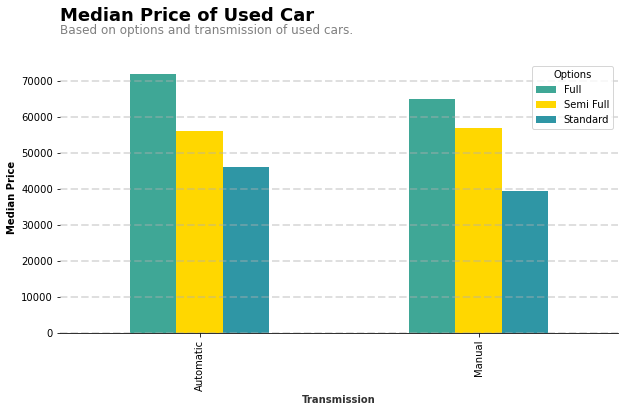

In [865]:
ax = transmission_pivot.plot.bar(figsize=(10, 5),color=["#3FA796","#FFD700","#2f96a5"])
ax.set_xlabel('Transmission',fontweight= "bold",alpha= 0.8, zorder= 4)
ax.set_ylabel('Median Price',fontweight= "bold")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(
    "Median Price of Used Car", 
    pad= 40, 
    loc= "left",
    fontdict= 
        {
        'fontsize': 18,
        'fontweight': "bold",
        'verticalalignment': 'baseline',
        })

ax.text(
    -0.5, 
    ax.get_ylim()[-1] * 1.1, 
    'Based on options and transmission of used cars.', 
    fontsize= 12, 
    color= "grey")
ax.grid(axis= "y", zorder= 0, linestyle= "--", linewidth= 2, alpha= 0.4);

****

## 4. Modelling

In [866]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Feature Engineering - creating a new feature “Age”

In [867]:
df_model.insert(7,'Age',2022 - df_model["Year"].astype(int))
df_model = df_model.drop(['Year'],axis=1)

#### Encoding

In [868]:
df_model.nunique()

Type             303
Region            27
Car_Brands        54
Transmission       2
Origin             3
Options            3
Age               40
Engine_Size       61
Mileage         1225
Price            294
dtype: int64

Based on unique value each columns above, we will encode categorical data as follow:

* `Type`, `Region`, `Car_Brands`: has many unique value and not a sequentially number, we will use **Binary Encoder**
* `Transmission`, `Origin`, `Options`: has a few of unique value, we will use **One Hot Encoder**


In [869]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Transmission', 'Origin','Options']),
    ('Binary', ce.BinaryEncoder(), ['Type','Region','Car_Brands'])
], remainder='passthrough')

#### Data Splitting

In [870]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Price'], axis=1)
y = df_model['Price']

#### Train & Test Splitting Data

In [871]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

In [872]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names())
testing.head()

,One Hot__x0_Manual,One Hot__x1_Other,One Hot__x1_Saudi,One Hot__x2_Semi Full,One Hot__x2_Standard,Binary__Type_0,Binary__Type_1,Binary__Type_2,Binary__Type_3,Binary__Type_4,...,Binary__Region_4,Binary__Car_Brands_0,Binary__Car_Brands_1,Binary__Car_Brands_2,Binary__Car_Brands_3,Binary__Car_Brands_4,Binary__Car_Brands_5,Age,Engine_Size,Mileage
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,5.3,90531.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,3.3,111744.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,3.0,113000.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,2.0,115.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,15.0,1.1,100000.0


#### Choose a Benchmark Model

In [873]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-24555.1403059  -29470.50312302 -26970.59133409 -25997.87460376
 -24230.22156583] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-17380.85097421 -19004.6861377  -19033.41376502 -18000.73676568
 -16962.68677122] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.35592987 -0.39246862 -0.33978093 -0.32734072 -0.29506599] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-19160.51478963 -23947.37559954 -22939.00957602 -21312.28994193
 -22066.46805666] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-13633.19211815 -15795.31568943 -15882.36097064 -14470.76225591
 -15620.65158471] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [874]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-26244.866187,1892.426061,-18076.474883,837.551312,-0.342117,0.032136
1,KNN Regressor,-21885.131593,1621.608852,-15080.456524,884.554852,-0.316285,0.019804
2,DecisionTree Regressor,-25735.346857,439.235204,-16381.091422,358.288097,-0.343715,0.045436
3,RandomForest Regressor,-19305.683148,1112.284835,-12336.981235,671.040014,-0.245416,0.034512
4,XGBoost Regressor,-17781.858144,1537.117582,-11497.126676,786.974817,-0.223066,0.036224


There is a significant difference between the RMSE and MAE values, where the RMSE value is higher because the residuals or errors are squared before being averaged. This causes RMSE to give a higher 'weight' for large error values. In other words, large error values are generated by all the algorithms used, so there is a significant difference between the RMSE and MAE values

- Based on the RMSE value, XGBoost is the best model. Meanwhile, based on MAE and MAPE values, RandomForest has the lowest value.
- Next, predictions will be made on the test set with the 2 best benchmark models, namely XGBoost and RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediction on the test set using XGBoost and Random Forest models

In [875]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))


score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,16876.854364,11750.048657,0.248928
RandomForest,18017.900710,11998.981857,0.267112


When predicting the test set, XGBoost's cumulative performance is slightly better. This can be seen from the RMSE and MAE values which are slightly lower than RandomForest.

#### Hyperparameter Tuning

Since the XGBoost model performs slightly better than RandomForest, we will then use this XGBoost model as the final model. At this stage, we will perform hyperparameter tuning on the XGBoost model in the hope of improving the model's performance.

In [876]:
# Kedalaman pohon
max_depth = [3, 5, 6, 10, 15, 20]

# Learning rate
learning_rate = [0.01, 0.1, 0.2, 0.3]

# Jumlah pohon
n_estimators = [100, 500, 1000]

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.5, 1.0, 0.1))

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.4, 1.0, 0.1))

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [877]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error','r2'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [878]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Transmission',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Car_Brands'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              XGBRegress...
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.5, 0.6, 0.7,
                                                             0.7999999999999999,
                                                             0.8999999999999999]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error', 'r2'])

In [879]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
17,5.205619,0.133467,0.069105,0.006683,0.8,0.021544,500,6,0.1,5,...,0.039937,12,0.844376,0.799932,0.831327,0.787239,0.830407,0.818656,0.021437,1
4,5.688214,0.193587,0.065708,0.010268,0.9,0.002783,500,6,0.1,1,...,0.030578,7,0.842447,0.812998,0.813732,0.783947,0.834028,0.817430,0.020277,2
5,10.826761,0.167983,0.074173,0.012279,0.9,10.0,1000,6,0.1,1,...,0.037613,9,0.841137,0.806849,0.815502,0.780379,0.834311,0.815636,0.021538,3
38,10.893817,0.284842,0.069317,0.011592,0.9,0.021544,1000,5,0.1,6,...,0.033204,4,0.843234,0.816375,0.807114,0.769298,0.832230,0.813650,0.025447,4
34,8.443064,0.089526,0.074311,0.005481,0.8,0.464159,1000,5,0.1,1,...,0.039231,14,0.840811,0.808192,0.822037,0.768136,0.823649,0.812565,0.024509,5


In [880]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -16650.53144518839
Best_params: {'model__subsample': 0.7999999999999999, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 500, 'model__max_depth': 6, 'model__learning_rate': 0.1, 'model__gamma': 5, 'model__colsample_bytree': 0.5}


**Predict to Test Set with the Tuned Model**

Make predictions on the test set using the XGBoost model and selected hyperparameters.

In [881]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,15498.501071,10507.111929,0.220368


**Performance Comparison**

Comparison of XGBoost model performance before and after hyperparameter tuning.

In [882]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,16876.854364,11750.048657,0.248928


In [883]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,15498.501071,10507.111929,0.220368


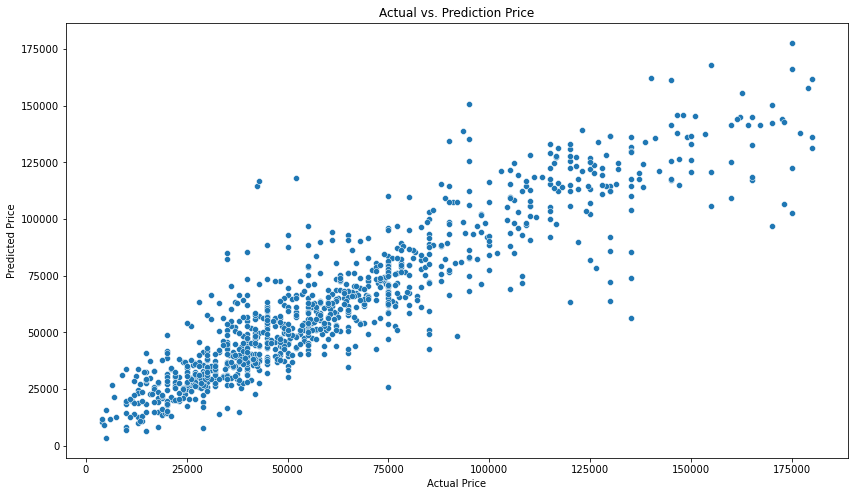

In [884]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

The presence of large error values ​​makes a significant difference between the RMSE and MAE values. This can also be illustrated in the plot above, where the actual price is low but predicted to be much higher (overestimation), and vice versa (underestimation). However, the MAPE value obtained, which is around 22%, makes this model can be categorized into 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

In [891]:
# Plot feature importances
feature_import = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_import 

Binary__Car_Brands_2     0.127261
Age                      0.110267
Engine_Size              0.090157
One Hot__x2_Standard     0.075122
Binary__Car_Brands_4     0.052023
Binary__Car_Brands_1     0.042265
Binary__Car_Brands_0     0.038636
Binary__Type_7           0.037071
Mileage                  0.035012
Binary__Car_Brands_5     0.034428
Binary__Type_8           0.029192
One Hot__x1_Saudi        0.028537
Binary__Car_Brands_3     0.026625
Binary__Type_5           0.026221
Binary__Type_6           0.024777
Binary__Type_2           0.024097
Binary__Type_4           0.023155
Binary__Type_3           0.022350
One Hot__x2_Semi Full    0.022077
Binary__Type_1           0.019740
Binary__Region_0         0.019717
Binary__Region_2         0.017500
One Hot__x1_Other        0.016754
Binary__Type_0           0.016640
Binary__Region_3         0.011201
One Hot__x0_Manual       0.011188
Binary__Region_1         0.010301
Binary__Region_4         0.007687
dtype: float32

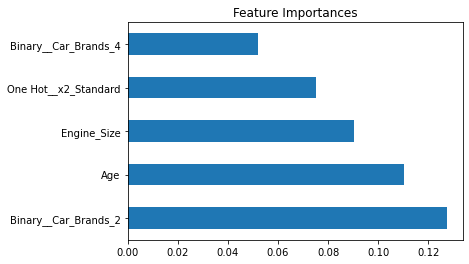

In [888]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

---

## 5. Conclusion

Based on the modeling that has been done, the `Car_Brands` and `Age` features are the features that have the most influence on 'price'.

The RMSE value generated by the model after hyperparameter tuning, which is 15498, we can conclude that the model we created when used to estimate car prices in the value range as trained on the model (maximum price 175000 SAR), then the average price estimate will miss approximately 15498 SAR from the price it probably should have been. However, it is also possible that the prediction will miss even further because the bias generated by the model is still quite high when viewed from the visualization between the actual and predicted prices. The bias generated by this model is due to the lack of features in the dataset such as fuel type, body type, etc.

---

## 6. Recommendation

Things that can be done to develop the model to be even better, such as:

1. Checks which predictions have a high error value. We can group these errors into overestimation and underestimation groups, then choose only the most extreme 5% errors for each group. Later the grouping will be divided into 3 groups, namely overestimation (5%), underestimation (5%), and the majority group whose error is close to the mean value (90%). After that, we can check the relationship between the error and each independent variable. In the end, we can find out exactly which variables and what aspects cause the model to produce high errors, so we can retrain with the application of other engineering features.
  
2. Feature engineering; create new features that high correlated with target like fuel type and body type
  
3. Add more advanced model algorithm (SVM,  RNN) if there is additional data in dataset

In [893]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_carPrice_XGB.sav', 'wb'))

In [894]:
# Load model
# filename = 'Model_carPrice_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [896]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))